In [1]:
#####################################
import sys
sys.path.append("..\\src")
import numpy
import matplotlib.pyplot as plt
import pandas as pd
from SIR_model import SIR
from SEIR_model import SEIR
from SEIR_plusCAQ_model import SEIR_plusCAQ
from SEIR_plusCQD_model import SEIR_plusCQD
from SEIR_plusBG_model import SEIR_plusBG
from SEIR_plus_model import SEIR_plus

In [4]:
TS_data_confirm = pd.read_csv("..\\data\\jh_data\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_confirmed_US.csv")
TS_data_death = pd.read_csv("..\\data\\jh_data\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_deaths_US.csv") 
TS_data_confirm.set_index('UID',inplace = True)
TS_data_death.set_index('UID',inplace = True)
Miami_dade_comfirm = TS_data_confirm.loc[84012086]
Miami_dade_death = TS_data_death.loc[84012086]
Miami_dade_comfirm = Miami_dade_comfirm.drop(labels=['iso2', 'iso3','code3','FIPS','Province_State','Country_Region','Lat','Long_','Combined_Key','Admin2'])
Miami_dade_comfirm = Miami_dade_comfirm[Miami_dade_comfirm!=0]
Miami_dade_death = Miami_dade_death.drop(labels=['iso2', 'iso3','code3','FIPS','Province_State','Country_Region','Lat','Long_','Combined_Key','Admin2'])
for i in range(len(Miami_dade_death)):
    if Miami_dade_death.index[0] != Miami_dade_comfirm.index[0]:
        Miami_dade_death = Miami_dade_death.drop([Miami_dade_death.index[0]])
BHSF_data = pd.read_excel("..\data\Ih_D.xlsx")
BHSF_data = BHSF_data.fillna(0)
BHSF_data.head(55)
#print(Miami_dade_comfirm)
print(Miami_dade_death)
# real_data = BHSF_data['cumulative_pos_IP'].to_numpy()
# real_data = numpy.delete(real_data, [0,1,2,3,4])
# print(real_data)
BHSF_data.drop(BHSF_data.tail(6).index,inplace=True)
BHSF_data.head(55)

3/12/20      0
3/13/20      0
3/14/20      0
3/15/20      0
3/16/20      0
3/17/20      0
3/18/20      0
3/19/20      0
3/20/20      0
3/21/20      0
3/22/20      0
3/23/20      0
3/24/20      0
3/25/20      0
3/26/20      0
3/27/20      1
3/28/20      2
3/29/20      3
3/30/20      3
3/31/20      7
4/1/20       7
4/2/20      20
4/3/20      25
4/4/20      31
4/5/20      31
4/6/20      37
4/7/20      41
4/8/20      49
4/9/20      62
4/10/20     74
4/11/20     91
4/12/20     97
4/13/20    109
4/14/20    125
4/15/20    146
4/16/20    183
4/17/20    195
4/18/20    198
4/19/20    207
4/20/20    223
4/21/20    233
4/22/20    240
4/23/20    270
4/24/20    287
4/25/20    295
4/26/20    301
4/27/20    302
Name: 84012086.0, dtype: object


,Date,positive_IP_count,pos_discharged_count,pos_deceased_count,Unnamed: 4,cumulative_pos_IP,cumulative_deceased
0,2020-03-11,1.0,0.0,0.0,0.0,1,0
1,2020-03-12,0.0,0.0,0.0,0.0,1,0
2,2020-03-13,1.0,0.0,0.0,0.0,2,0
3,2020-03-14,6.0,0.0,0.0,0.0,8,0
4,2020-03-15,2.0,2.0,0.0,0.0,8,0
5,2020-03-16,3.0,1.0,0.0,0.0,10,0
6,2020-03-17,6.0,0.0,0.0,0.0,16,0
7,2020-03-18,1.0,3.0,0.0,0.0,14,0
8,2020-03-19,7.0,2.0,0.0,0.0,19,0
9,2020-03-20,10.0,2.0,0.0,0.0,27,0


In [3]:
# init parameters
mean_latent_period = 5
mean_recovery_time = 14
double_time = 5.5
rate_of_growth = 2**(1.0/double_time) - 1.0

population = 2716940         # init N
number_of_current_hospitalized_patients = 50
infected = 278
hospital_market_share = 0.22          # % of people will come to your hospital
hospitalization_percent= (135/hospital_market_share)/7712

#number_of_all_infected = 
social_distancing = 0              # %
ICU_rate = (135/532)*hospital_market_share

ventilated_percent = (85/532)*hospital_market_share
print(ventilated_percent)
hospital_stay = 7
ICU_stay = 9.1
Ventilator_days = 11.6
duration_of_immunization = 60
death_rate = 0.022
t=numpy.linspace(0,80,80)
# N, beta1, beta2, sigma, alpha, rho, rho_icu, rho_v,
# lamda1, lamda2, lamda_icu, lamda_v, kappa
N = population #population
I = infected   #(number_of_current_hospitalized_patients / hospital_market_share)/hospitalization_percent
E = I * mean_latent_period
R = 0
D = 7
S = N - E - I - R - D
Ih = number_of_current_hospitalized_patients/hospital_market_share
Im = I - Ih

Iicu = 15/hospital_market_share
Iv = 6/hospital_market_share
beta = (rate_of_growth + 1/mean_recovery_time)/S * (1- social_distancing)

date = pd.date_range(start="2020-03-23",end="2020-06-11",periods=80)
date = numpy.array(date)
date_real = pd.date_range(start="2020-03-23",end="2020-04-19",periods=28)
date_real = numpy.array(date_real)


0.035150375939849626


In [4]:
#SEIR+MHD
# param
beta1 = beta
beta2 = beta1 * 0.1
sigma = 1/duration_of_immunization
alpha = 1/mean_latent_period
rho = hospitalization_percent
rho_icu = ICU_rate
rho_v = ventilated_percent
lamda1 = 1/ mean_recovery_time
lamda2 = 1/ hospital_stay
lamda_icu = 1/ ICU_stay
lamda_v = 1/Ventilator_days
kappa = death_rate
data = [S, E, Im, Ih, Iicu, Iv, D, R]
SEIR_MHD = SEIR_plus(data, t, N, beta1, beta2, sigma, alpha, rho, rho_icu, rho_v,
                           lamda1, lamda2, lamda_icu, lamda_v, kappa)
solution = SEIR_MHD.solve()
print(beta1)

7.577201253801528e-08


In [5]:
#realdata = numpy.array([155,168,166,167,166,170,155,160,156,151,147,145,135,135])
realdata = BHSF_data['cumulative_pos_IP'].to_numpy()
realdata = numpy.delete(realdata, [0,1,2,3,4,5,6,7,8,9,10,11])
real_vent = numpy.array([6,13,15,21,27,29,31,30,32,34,36,41,42,43,48,50,48,45,47,49,48,47,47,49,47,45,39,39,37,33,31,31,26,25,24,17,16,14,14,9,6,7])
real_icu = numpy.array([15,19,18,25,31,40,41,40,41,47,50,58,60,60,65,66,61,62,70,65,65,67,61,61,62,62,61,56,56,57,50,49,46,37,34,37,36,26,24,23,16,18])
print(real_vent.shape)

(42,)


In [6]:

beta1, beta2, alpha ,lamda1, rho, kappa, sigma= SEIR_MHD.train(realdata/hospital_market_share)
print(beta1,beta2,alpha,lamda1, rho, kappa, sigma)

D:\Users\jingc\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:516: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)


60.976166316275716
-3.931792498639798e-11 -5.095336604276057e-11 0.046173605293285326 -0.05317409781362967 1.853641245227109 -0.05365745996345229 0.06332491919287853


In [7]:
SEIR_MHD = SEIR_plus(data, t, N, beta1, beta2, sigma, alpha, rho, rho_icu, rho_v,
                           lamda1, lamda2, lamda_icu, lamda_v, kappa)
solution = SEIR_MHD.solve()

In [8]:
date_real = pd.date_range(start="2020-03-23",end="2020-05-03",periods=42)
date_real = numpy.array(date_real)
realdata = numpy.append(realdata,66)
realdata = numpy.append(realdata,68)
realdata = numpy.append(realdata,62)
realdata = numpy.append(realdata,52)
realdata = numpy.append(realdata,50)
realdata = numpy.append(realdata,49)

size  = len(realdata)
RMSE_Ih= numpy.sqrt(numpy.mean((solution[:,3][:42]*hospital_market_share - realdata) ** 2))
PI_Ih = 1.96*RMSE_Ih
RMSE_Iicu = numpy.sqrt(numpy.mean((solution[:,4][:42]*hospital_market_share - real_icu) ** 2))
PI_Iicu = 1.96*RMSE_Iicu
RMSE_Iv = numpy.sqrt(numpy.mean((solution[:,5][:42]*hospital_market_share - real_vent) ** 2))
PI_Iv = 1.96*RMSE_Iv

print(PI_Ih,PI_Iicu,PI_Iv)
PI_Ih = 25
PI_Iicu = 19
PI_Iv = 22

upper_PI_Ih= numpy.zeros(len(solution[:,3]))
lower_PI_Ih= numpy.zeros(len(solution[:,3]))
upper_PI_Iicu= numpy.zeros(len(solution[:,4]))
lower_PI_Iicu= numpy.zeros(len(solution[:,4]))
upper_PI_Iv= numpy.zeros(len(solution[:,5]))
lower_PI_Iv= numpy.zeros(len(solution[:,5]))
for i in range(len(solution[:,3])):
    if i ==0:
        upper_PI_Ih[i] = solution[:,3][i]*hospital_market_share
        lower_PI_Ih[i] = solution[:,3][i]*hospital_market_share
        upper_PI_Iicu[i] = solution[:,4][i]*hospital_market_share
        lower_PI_Iicu[i] = solution[:,4][i]*hospital_market_share
        upper_PI_Iv[i] = solution[:,5][i]*hospital_market_share
        lower_PI_Iv[i] = solution[:,5][i]*hospital_market_share
    else:
        upper_PI_Ih[i] = solution[:,3][i]*hospital_market_share + PI_Ih
        lower_PI_Ih[i] = solution[:,3][i]*hospital_market_share - PI_Ih
        upper_PI_Iicu[i] = solution[:,4][i]*hospital_market_share + PI_Iicu
        lower_PI_Iicu[i] = solution[:,4][i]*hospital_market_share - PI_Iicu      
        upper_PI_Iv[i] = solution[:,5][i]*hospital_market_share + PI_Iv
        lower_PI_Iv[i] = solution[:,5][i]*hospital_market_share - PI_Iv     
               

30.964055468087263 30.034614203872504 33.58666038890934


D:\Users\jingc\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
D:\Users\jingc\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  from ipykernel import kernelapp as app


<Figure size 7200x4800 with 0 Axes>

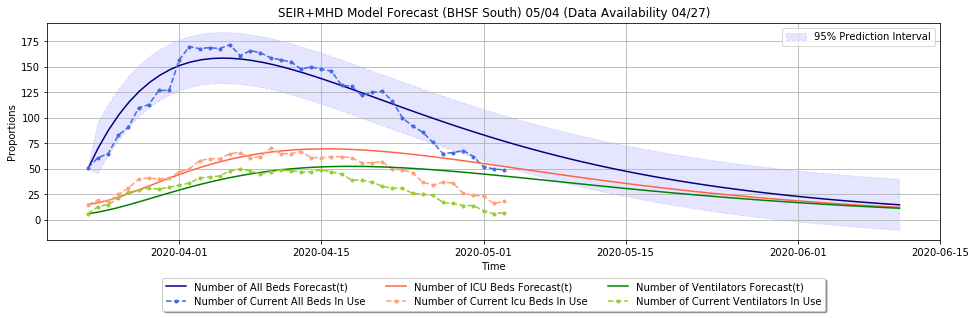

In [9]:
from matplotlib.pyplot import *
plt.figure(dpi=1200)
plt.figure(figsize=[16,4])
ax = plt.subplot(111)

ax.plot(date,solution[:,3]*hospital_market_share,label="Number of All Beds Forecast(t)",color = 'navy')
ax.plot(date_real,realdata,label="Number of Current All Beds In Use",linestyle="--",  marker = ".",color = 'royalblue')

ax.plot(date,solution[:,4]*hospital_market_share,label="Number of ICU Beds Forecast(t)",color = 'tomato')
ax.plot(date_real,real_icu,label="Number of Current Icu Beds In Use",linestyle="--", marker = ".",color = 'lightsalmon')

ax.plot(date,solution[:,5]*hospital_market_share,label="Number of Ventilators Forecast(t)",color = 'green')
ax.plot(date_real,real_vent,label="Number of Current Ventilators In Use",linestyle="--", marker = ".",color = 'yellowgreen')

p_Ih = ax.fill_between(date, upper_PI_Ih, lower_PI_Ih, color="B", linestyle="--", alpha = 0.1)
# p_Iicu = ax.fill_between(date, upper_PI_Iicu, lower_PI_Iicu, color="R", linestyle="--", alpha = 0.1)
# p_Iv = ax.fill_between(date, upper_PI_Iv, lower_PI_Iv, color="G", linestyle="--", alpha = 0.1)

ax.grid()
box = ax.get_position()
# Put a legend below current axis
l1 = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)
l2 = ax.legend([p_Ih],['95% Prediction Interval'])
gca().add_artist(l1)
#plt.legend(loc = "upper right")
plt.xlabel("Time")
plt.ylabel("Proportions")
plt.title("SEIR+MHD Model Forecast (BHSF South) 05/04 (Data Availability 04/27)")
plt.savefig('..\\result\\graph\\SEIR+MHD Model Forecast 0504.png',dpi=800,bbox_extra_artists=(l1,l2), bbox_inches='tight')
plt.show()

In [10]:
output_data = {'Date':date,
               'Number of Current All Beds In Use': realdata,
               'Number of All Beds Forecast': numpy.ceil(solution[:,3]*hospital_market_share),
               'Number of Current Icu Beds In Use': real_icu,
               'Number of ICU Beds Forecast': numpy.ceil(solution[:,4]*hospital_market_share),
               'Number of Current Ventilators In Use': real_vent,
               'Number of Ventilators Forecast': numpy.ceil(solution[:,5]*hospital_market_share)}

output_df = pd.DataFrame.from_dict(output_data, orient='index')
output_df = output_df.transpose()
output_df.set_index('Date',inplace = True)
output_df.index = output_df.index.normalize()
output_df.to_csv('..\\result\\forcast_result_05_04.csv')

<Figure size 4800x3200 with 0 Axes>

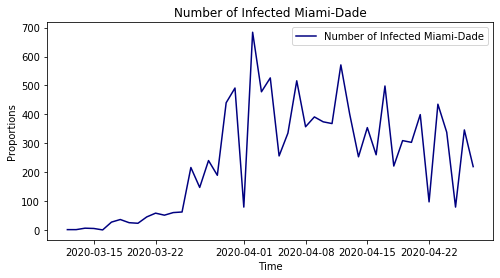

In [11]:

Miami_daily = numpy.zeros(len(Miami_dade_comfirm))
for i in range(len(Miami_dade_comfirm)):
    if i == 0:
        Miami_daily[i]=Miami_dade_comfirm[i]
    else:
         Miami_daily[i] = Miami_dade_comfirm[i] - Miami_dade_comfirm[i-1]
plt.figure(dpi=800)
plt.figure(figsize=[8,4])
ax = plt.subplot(111)

date_real = pd.date_range(start="2020-03-12",end="2020-04-27",periods=47)
date_real = numpy.array(date_real)
ax.plot(date_real,Miami_daily,label="Number of Infected Miami-Dade",color = 'navy')
ax.legend()
plt.xlabel("Time")
plt.ylabel("Proportions")
plt.title("Number of Infected Miami-Dade")
plt.savefig('..\\result\\graph\\Number of Infected Miami-Dade.png',dpi=800)
plt.show()

No handles with labels found to put in legend.


ValueError: x and y must have same first dimension, but have shapes (47,) and (48,)

<Figure size 4800x3200 with 0 Axes>

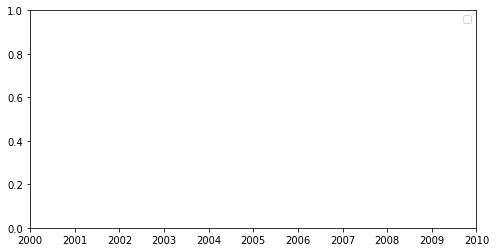

In [12]:
realdata = BHSF_data['positive_IP_count'].to_numpy()
date_real_I = numpy.array(date_real)
date_real = pd.date_range(start="2020-03-11",end="2020-04-26",periods=47)
plt.figure(dpi=800)
plt.figure(figsize=[8,4])
ax = plt.subplot(111)
ax.legend()
ax.plot(date_real,realdata,label="Number of Hospitalized BHSF South",color = 'royalblue')
ax.legend()
plt.xlabel("Time")
plt.ylabel("Proportions")
plt.title("Number of Hospitalized BHSF")
plt.savefig('..\\result\\graph\\Number of Hospitalized BHSF.png',dpi=800)
plt.show()

In [4]:
para_df = pd.read_excel('..\\data\\parameters_6_23.xlsx', index_col=[0])
para_df

,Value
Predict_Days,8.000000e+01
Hospital_Market_Share,2.200000e-01
Population,2.716940e+06
Infected,1.058800e+04
Death,2.700000e+02
Recovered,0.000000e+00
Hospitalized_Patient,5.000000e+01
Hospitalized_Percentage,3.916834e-01
Hospital_Average_Stay,5.308987e+00
ICU_Percentage,5.582707e-02


In [10]:
para_df = pd.read_excel('..\\data\\6_23.xlsx', index_col=[0])
para_df.tail(50)

,Date,positive_IP_count,pos_discharged_count,pos_deceased_count,current_vent,current_icu
55,2020-05-05,8,8,0,0,0
56,2020-05-06,8,8,0,0,0
57,2020-05-07,13,8,0,0,0
58,2020-05-08,6,14,0,0,0
59,2020-05-09,19,1,0,0,0
60,2020-05-10,13,2,0,0,0
61,2020-05-11,6,6,0,0,0
62,2020-05-12,8,7,0,0,0
63,2020-05-13,10,7,0,0,0
64,2020-05-14,8,5,0,0,0
